# Data Science Project — Planning Report

## 1. Data Description

## 2. Broad & Specific Questions

## 3. Exploratory Data Analysis (EDA)

## 4. Methods & Model Plan

## 5. GitHub Link

In [1]:
library(tidyverse)

players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

glimpse(players)
glimpse(sessions)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimite

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

In [3]:
players_summary <- tibble(
  variable = names(players),
  type = sapply(players, typeof),
  description = c(
    "Self-reported experience level of the player",
    "Whether the player subscribed to the newsletter (TRUE/FALSE)",
    "Anonymized email identifier for matching sessions",
    "Total hours the player has played",
    "Player name (anonymized)",
    "Gender of the player",
    "Age of the player"
  )
)

players_summary

variable,type,description
<chr>,<chr>,<chr>
experience,character,Self-reported experience level of the player
subscribe,logical,Whether the player subscribed to the newsletter (TRUE/FALSE)
hashedEmail,character,Anonymized email identifier for matching sessions
played_hours,double,Total hours the player has played
name,character,Player name (anonymized)
gender,character,Gender of the player
Age,double,Age of the player


In [4]:
sessions_summary <- tibble(
  variable = names(sessions),
  type = sapply(sessions, typeof),
  description = c(
    "Anonymized email identifier linking to players.csv",
    "Start time of the session",
    "End time of the session",
    "Original start timestamp (raw format)",
    "Original end timestamp (raw format)"
  )
)

sessions_summary

variable,type,description
<chr>,<chr>,<chr>
hashedEmail,character,Anonymized email identifier linking to players.csv
start_time,character,Start time of the session
end_time,character,End time of the session
original_start_time,double,Original start timestamp (raw format)
original_end_time,double,Original end timestamp (raw format)


In [5]:
players_numeric_means <- players %>%
  summarize(across(where(is.numeric), ~ round(mean(.x, na.rm = TRUE), 2)))

players_numeric_means

played_hours,Age
<dbl>,<dbl>
5.85,21.14


1. Data Description

The dataset consists of two files, players.csv and sessions.csv, which together describe the characteristics of players on a Minecraft research server and their individual gameplay sessions.

1.1 players.csv

Rows: 196

Columns: 7

Description: Contains demographic and self-reported information about each unique player, as well as an anonymized identifier used to link to session-level data.

In [8]:
players_summary

variable,type,description
<chr>,<chr>,<chr>
experience,character,Self-reported experience level of the player
subscribe,logical,Whether the player subscribed to the newsletter (TRUE/FALSE)
hashedEmail,character,Anonymized email identifier for matching sessions
played_hours,double,Total hours the player has played
name,character,Player name (anonymized)
gender,character,Gender of the player
Age,double,Age of the player


Summary statistics for numeric variables - mean values （All values rounded to two decimal places）

In [10]:
players_numeric_means

played_hours,Age
<dbl>,<dbl>
5.85,21.14


1.2 sessions.csv

Rows: 1,535

Columns: 5

Description: Contains detailed information on each gameplay session, including start/end timestamps.

In [11]:
sessions_summary

variable,type,description
<chr>,<chr>,<chr>
hashedEmail,character,Anonymized email identifier linking to players.csv
start_time,character,Start time of the session
end_time,character,End time of the session
original_start_time,double,Original start timestamp (raw format)
original_end_time,double,Original end timestamp (raw format)


1.3 Data Quality and Potential Issues

Timestamp format inconsistency:
start_time and end_time are stored as character strings, while raw timestamps are doubles. These must be cleaned and converted before analysis.

Missing values:
Some players have played_hours equal to 0.0, which may indicate very short or incomplete sessions.

Self-reported variables:
experience is subjective and may not reflect true gameplay ability.

Sampling bias:
Players are not randomly sampled; they voluntarily join the server. This may limit generalizability.

Anonymized identifiers:
hashedEmail ensures privacy but requires careful merging to avoid mismatches.

Overall, the dataset is clean and relatively small, but requires preprocessing for timestamps and feature engineering before modelling.

2. Broad & Specific Questions
   
Broad Question:

What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter?

Specific Question:

Can player demographics and in-game behavioural features predict whether a player subscribes to the newsletter in the Minecraft research server dataset?

How the data will help:

The players.csv file provides demographic and self-reported information for each player. The sessions.csv file contains session-level records, with each row representing a gameplay session and its start and end times. By summarizing these sessions for each player (e.g., total playtime, number of sessions, average session duration), we can create player-level behavioural features to examine whether they help predict newsletter subscription.

3. Exploratory Data Analysis

I have already demonstrated that the dataset can be loaded into R and that I can compute the mean for a given value. In this section, I perform the minimum required wrangling to explore the data and visualize key patterns relevant to my prediction question.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


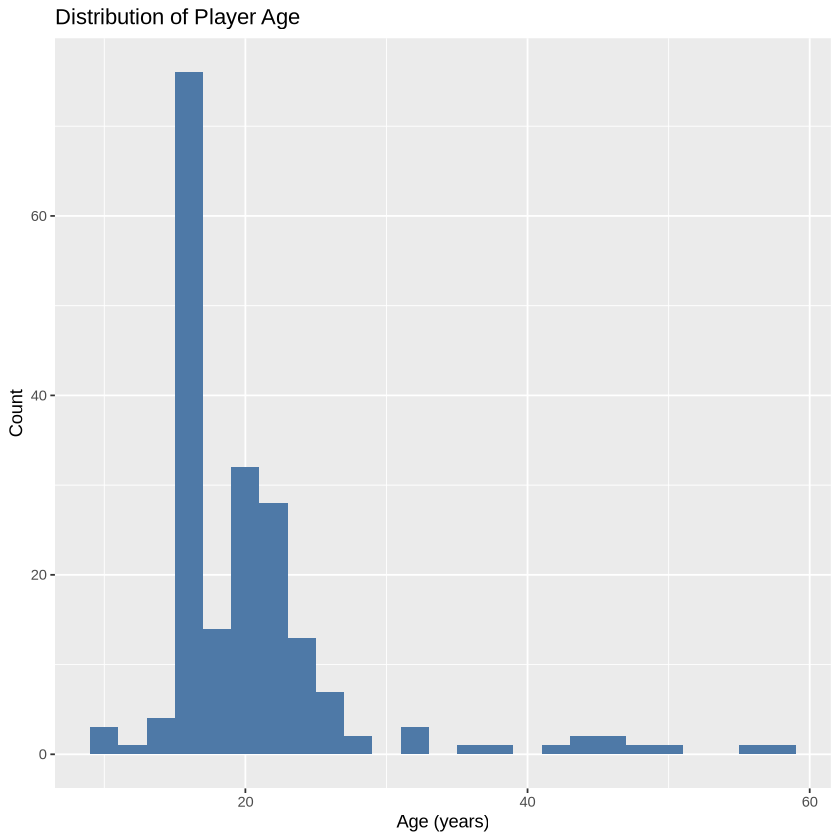

In [2]:
ggplot(players, aes(x = Age)) +
  geom_histogram(binwidth = 2, fill = "#4E79A7") +
  labs(
    title = "Distribution of Player Age",
    x = "Age (years)",
    y = "Count"
  )

Insight: Younger players dominate the sample, with most between ages 18–25. This age concentration may influence subscription behaviour patterns and should be considered when interpreting predictive results.

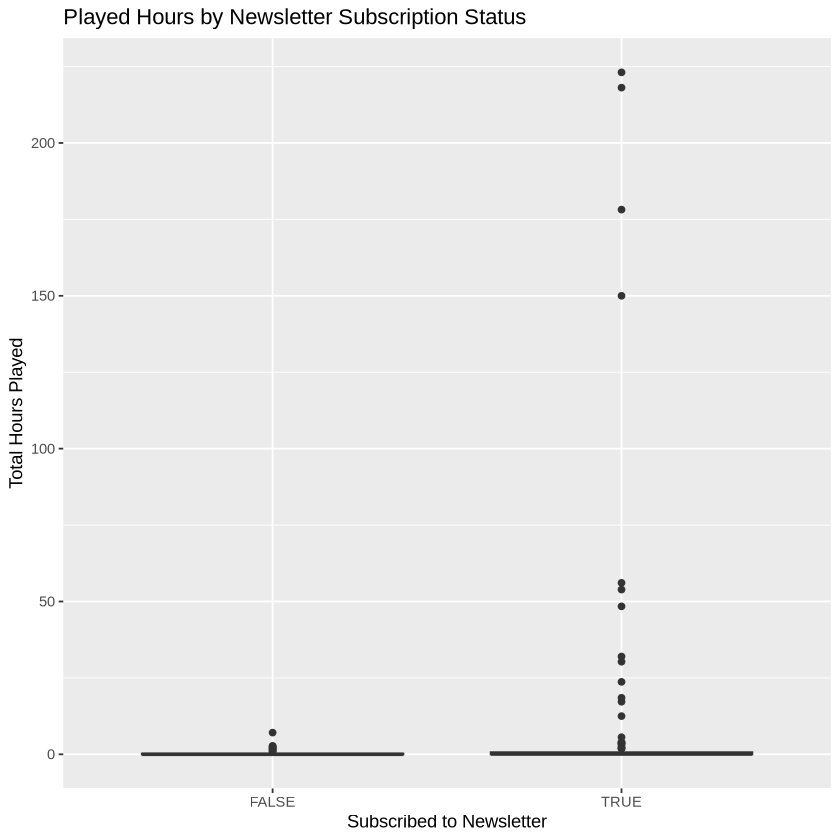

In [4]:
ggplot(players, aes(x = subscribe, y = played_hours)) +
  geom_boxplot(fill = "#F28E2B") +
  labs(
    title = "Played Hours by Newsletter Subscription Status",
    x = "Subscribed to Newsletter",
    y = "Total Hours Played"
  )

Insight: Subscribed players appear to have slightly higher total playtime, suggesting gameplay engagement may relate to the likelihood of subscribing to the newsletter.

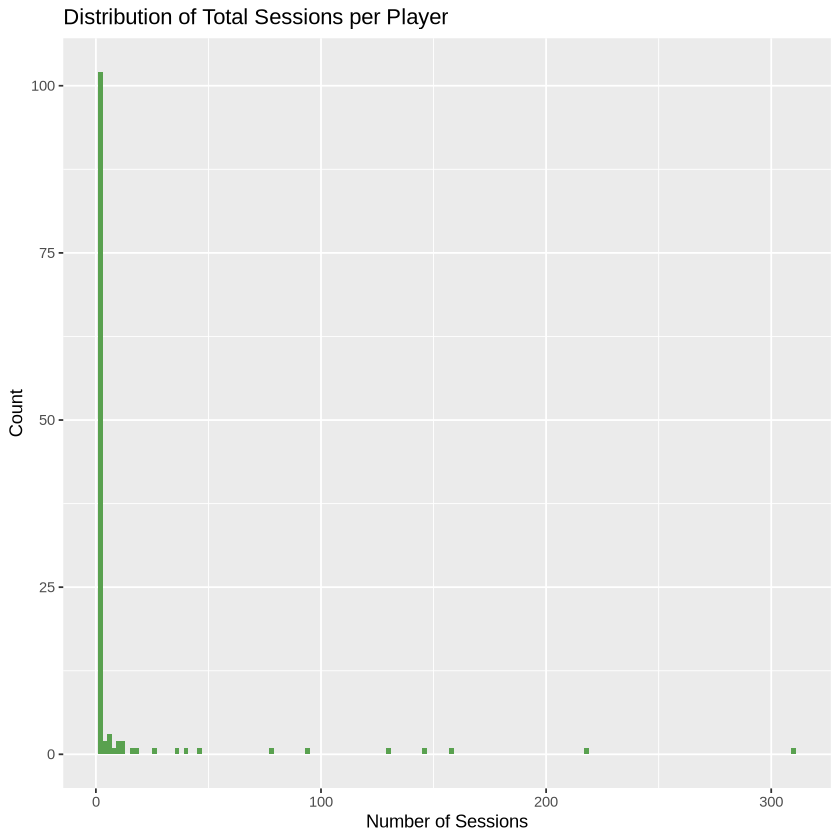

In [5]:
player_sessions <- sessions %>%
  group_by(hashedEmail) %>%
  summarize(total_sessions = n())

ggplot(player_sessions, aes(x = total_sessions)) +
  geom_histogram(binwidth = 2, fill = "#59A14F") +
  labs(
    title = "Distribution of Total Sessions per Player",
    x = "Number of Sessions",
    y = "Count"
  )

Insight： Most players have only a small number of sessions, while a few contribute many. This imbalance suggests that session-derived behavioural features may vary widely between players.

These exploratory findings highlight differences in player engagement and demographic patterns that may be relevant to predicting newsletter subscription.